### Write a Python Program to demonstrate feature extraction and t-SNE Visualization.

In [62]:
from tensorflow.keras import datasets
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.manifold import TSNE
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
(x_train,y_train),(_,_)=datasets.cifar10.load_data()

In [65]:
images=x_train[:100]
labels=y_train[:100].flatten()

In [66]:
def preprocess_images(images):
    images_resized=np.array([tf.image.resize(image, (224,224)).numpy() for image in images])
    return preprocess_input(images_resized)

images_preprocessed=preprocess_images(images)

In [67]:
resnet_model=ResNet50(weights='imagenet',include_top=False,pooling='avg')

In [68]:
features = resnet_model.predict(images_preprocessed)

3/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000012E17EF7D80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


In [69]:
tsne=TSNE(n_components=2,random_state=42)
features_2D=tsne.fit_transform(features)

In [70]:
cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

In [71]:
labels_named=[cifar10_classes[label] for label in labels]

<Axes: >

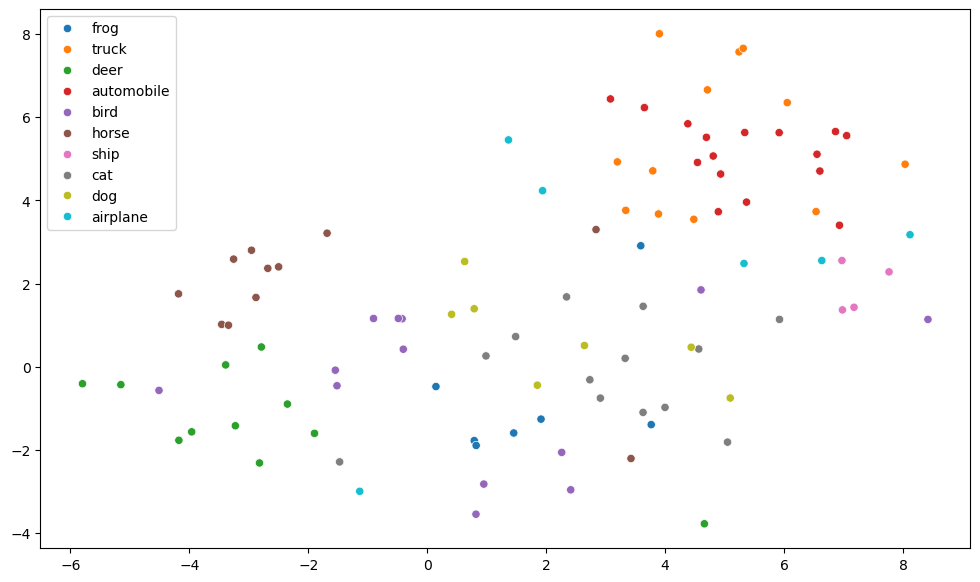

In [75]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=features_2D[:,0],y=features_2D[:,1],hue=labels_named)